In [ ]:
# Import necessary libraries
import glob  # For finding files matching a specific pattern
import pandas as pd  # For data manipulation and analysis, especially with DataFrames
!pip install plotly_express
import numpy as np
import plotly_express as px
import matplotlib.pyplot as plt
#reads all CSV files from a directory into a list of pandas DataFrames.


csv_files = glob.glob('/content/sample_data/storm_data/*.csv')
df_list = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    df_list.append(df)
df_list

<ipython-input-3-d05856ef04e4>:10: DtypeWarning: Columns (26,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
<ipython-input-3-d05856ef04e4>:10: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)
<ipython-input-3-d05856ef04e4>:10: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


[       BEGIN_YEARMONTH  BEGIN_DAY  BEGIN_TIME  END_YEARMONTH  END_DAY  \
 0               199507          3        1611         199507        3   
 1               199505         11        1750         199505       11   
 2               199505         11        1820         199505       11   
 3               199505          9         655         199505        9   
 4               199505          9        1005         199505        9   
 ...                ...        ...         ...            ...      ...   
 20459           199505         18         625         199505       18   
 20460           199505         18         619         199505       18   
 20461           199505         18         625         199505       18   
 20462           199505         18         629         199505       18   
 20463           199505         18         644         199505       18   
 
        END_TIME  EPISODE_ID   EVENT_ID     STATE  STATE_FIPS  ...  END_RANGE  \
 0          1611         NaN 

In [ ]:
len(df_list)

36

In [ ]:
#  concat all df in df_list


all_df = pd.concat(df_list, ignore_index=True)

In [ ]:
all_df

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,199507,3,1611,199507,3,1611,NaN,10314233,ALABAMA,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"* Pinson,03,1638CST- *,,1645CST,,,?,?,?,?,Hai...",CSV
1,199505,11,1750,199505,11,1750,NaN,10314421,ALABAMA,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dime-size hail was reported in Gulf Shores. T...,CSV
2,199505,11,1820,199505,11,1820,NaN,10314423,ALABAMA,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dime-size hail was reported in Gulf Shores. T...,CSV
3,199505,9,655,199505,9,655,NaN,10313845,ALABAMA,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Several trees were blown down along Highway 45...,CSV
4,199505,9,1005,199505,9,1008,NaN,10313846,ALABAMA,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A tornado was observed to touch down near the ...,CSV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1800901,199602,1,1800,199602,2,200,2403310.0,5542719,TEXAS,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,An ice storm over a large part of west central...,NaN,PDC
1800902,199603,25,0,199603,25,2359,2403370.0,5540330,ALASKA,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A frontal low moved northeastward from the nor...,NaN,PDC
1800903,199605,28,1739,199605,28,1742,NaN,5553873,KENTUCKY,21.0,...,1.0,SW,Hollyvilla,38.084105,-85.777412,38.077571,-85.745901,The supercell that crossed the Ohio River from...,NaN,NaN
1800904,199605,28,1742,199605,28,1808,NaN,5553874,KENTUCKY,21.0,...,3.0,ESE,Mount Washington,38.077571,-85.745901,38.037103,-85.499358,The supercell that crossed the Ohio River from...,NaN,NaN


In [ ]:
#check minimum value for all_df[BEGIN_YEARMONTH] and max value

print(f"Minimum value of BEGIN_YEARMONTH: {all_df['BEGIN_YEARMONTH'].min()}")
print(f"Maximum value of BEGIN_YEARMONTH: {all_df['BEGIN_YEARMONTH'].max()}")

Minimum value of BEGIN_YEARMONTH: 199001
Maximum value of BEGIN_YEARMONTH: 202502


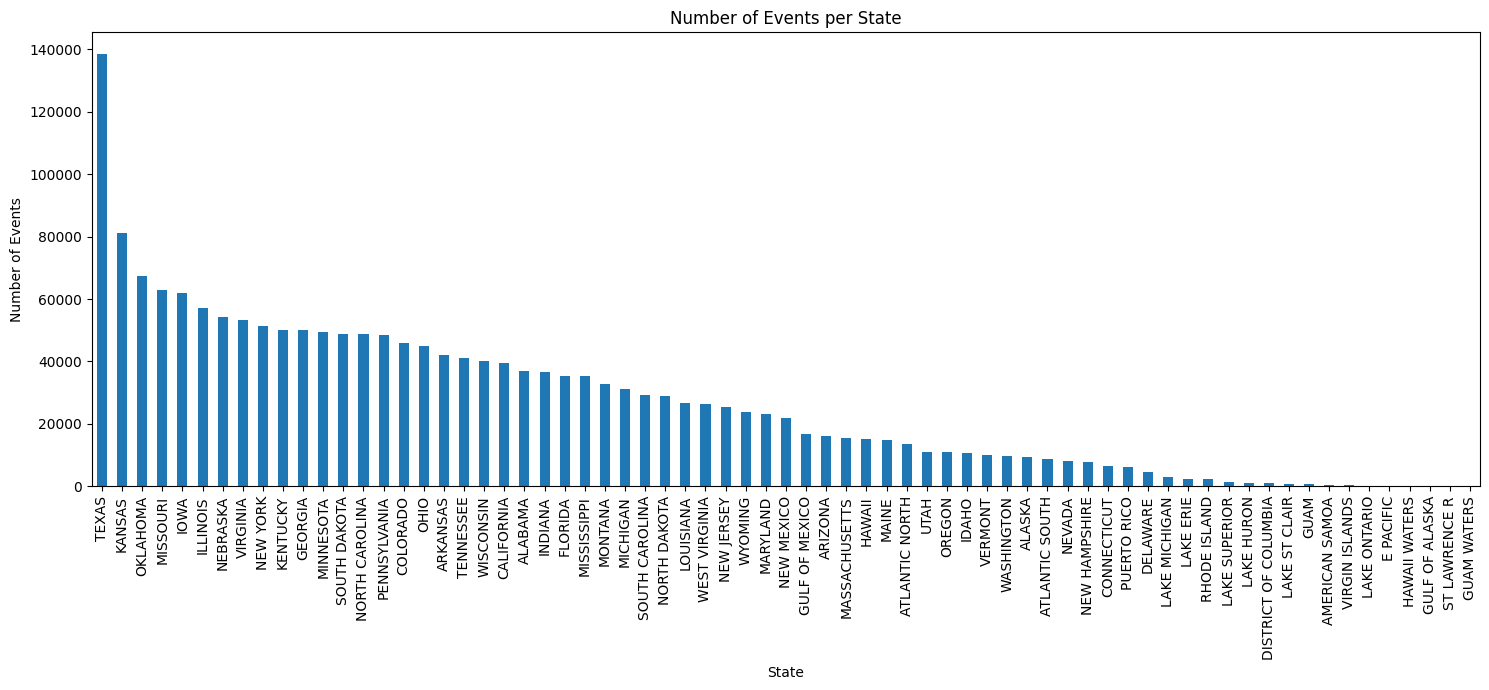

In [ ]:
# barchart of alldf[state]

import matplotlib.pyplot as plt

state_counts = all_df['STATE'].value_counts()

plt.figure(figsize=(15, 7))
state_counts.plot(kind='bar')
plt.title('Number of Events per State')
plt.xlabel('State')
plt.ylabel('Number of Events')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# put all unique value of all_df[state] in a list

states_list = all_df['STATE'].unique().tolist()
states_list

['ALABAMA',
 'FLORIDA',
 'KENTUCKY',
 'MICHIGAN',
 'MISSISSIPPI',
 'MISSOURI',
 'MINNESOTA',
 'NEBRASKA',
 'MONTANA',
 'NORTH CAROLINA',
 'NEW YORK',
 'OHIO',
 'GEORGIA',
 'MARYLAND',
 'PENNSYLVANIA',
 'TEXAS',
 'LOUISIANA',
 'SOUTH CAROLINA',
 'IOWA',
 'OKLAHOMA',
 'ILLINOIS',
 'MASSACHUSETTS',
 'NEW JERSEY',
 'NORTH DAKOTA',
 'INDIANA',
 'KANSAS',
 'ARKANSAS',
 'COLORADO',
 'TENNESSEE',
 'CONNECTICUT',
 'SOUTH DAKOTA',
 'NEVADA',
 'DELAWARE',
 'VIRGINIA',
 'IDAHO',
 'ARIZONA',
 'OREGON',
 'NEW MEXICO',
 'CALIFORNIA',
 'NEW HAMPSHIRE',
 'VERMONT',
 'MAINE',
 'RHODE ISLAND',
 'WISCONSIN',
 'WYOMING',
 'PUERTO RICO',
 'WEST VIRGINIA',
 'UTAH',
 'WASHINGTON',
 'HAWAII',
 'GULF OF MEXICO',
 'ATLANTIC NORTH',
 'ALASKA',
 'ATLANTIC SOUTH',
 'LAKE HURON',
 'LAKE MICHIGAN',
 'LAKE ERIE',
 'LAKE ONTARIO',
 'AMERICAN SAMOA',
 'DISTRICT OF COLUMBIA',
 'LAKE ST CLAIR',
 'LAKE SUPERIOR',
 'VIRGIN ISLANDS',
 'E PACIFIC',
 'HAWAII WATERS',
 'GUAM',
 'ST LAWRENCE R',
 'GULF OF ALASKA',
 'GUAM WATERS'

In [ ]:
# pcheck events count for al states

state_freq = all_df['STATE'].value_counts()
state_freq

,count
STATE,
TEXAS,138531
KANSAS,81244
OKLAHOMA,67516
MISSOURI,63005
IOWA,61795
...,...
E PACIFIC,232
HAWAII WATERS,46
GULF OF ALASKA,37


In [ ]:
# Mapping of full state names to postal abbreviations
state_abbrev_map = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}



In [ ]:
# add an extra column for state abbreviation to state_freq, matching should e done with lowercase

state_freq_df = state_freq.reset_index()
state_freq_df.columns = ['STATE', 'Frequency']

# Create a lower case mapping for matching
state_abbrev_map_lower = {k.lower(): v for k, v in state_abbrev_map.items()}

state_freq_df['STATE_LOWER'] = state_freq_df['STATE'].str.lower()
state_freq_df['STATE_ABBREVIATION'] = state_freq_df['STATE_LOWER'].map(state_abbrev_map_lower)

# Drop the temporary lower case column
state_freq_df = state_freq_df.drop(columns=['STATE_LOWER'])

print(state_freq_df.head())

      STATE  Frequency STATE_ABBREVIATION
0     TEXAS     138531                 TX
1    KANSAS      81244                 KS
2  OKLAHOMA      67516                 OK
3  MISSOURI      63005                 MO
4      IOWA      61795                 IA


In [ ]:


# Log-transform frequency to visibly distinguish flood scale
state_freq_df['Log_Frequency'] = np.log10(state_freq_df['Frequency'].replace(0, np.nan))

# Get distribution landmarks
min_val = state_freq_df['Log_Frequency'].min()
median_val = np.percentile(state_freq_df['Log_Frequency'], 50)
p75_val = np.percentile(state_freq_df['Log_Frequency'], 75)
max_val = state_freq_df['Log_Frequency'].max()

# Map log frequency to custom scale [0, 1]
def custom_scale(x):
    if x <= median_val:
        return 0.5 * (x - min_val) / (median_val - min_val)
    elif x <= p75_val:
        return 0.5 + 0.25 * (x - median_val) / (p75_val - median_val)
    else:
        return 0.75 + 0.25 * (x - p75_val) / (max_val - p75_val)

state_freq_df['Custom_Scale'] = state_freq_df['Log_Frequency'].apply(custom_scale)

# Add optional percentile info for hover
state_freq_df['Percentile'] = state_freq_df['Frequency'].rank(pct=True) * 100

# Custom hover text
state_freq_df['hover_text'] = state_freq_df.apply(
    lambda row: f"State: {row['STATE_ABBREVIATION']}<br>"
                f"Count: {int(row['Frequency'])}<br>"
                f"Log₁₀(Count): {row['Log_Frequency']:.2f}<br>"
                f"Percentile: {row['Percentile']:.1f}%", axis=1
)

# Final color scale
custom_colorscale = [
    [0.0, 'white'],
    [0.5, 'yellow'],
    [0.75, 'red'],
    [1.0, '#800000']  # Deep red
]

# Choropleth
fig = px.choropleth(state_freq_df,
                    locations='STATE_ABBREVIATION',
                    locationmode="USA-states",
                    color='Custom_Scale',
                    scope="usa",
                    color_continuous_scale=custom_colorscale,
                    hover_name='STATE_ABBREVIATION',
                    hover_data={     # Already shown in hover text
                                'hover_text': True},
                    title='Storm Event Frequency by State in the USA')

# Customize hover template to use our text
fig.update_traces(hovertemplate="%{customdata[0]}<extra></extra>")

# Set color bar with actual frequency labels (approximate)
tickvals = [0.0, 0.5, 0.75, 1.0]
ticktexts = [
    f"{int(10**min_val)}",                  # Min
    f"{int(10**median_val)}",               # Median
    f"{int(10**p75_val)}",                  # 75th percentile
    f"{int(10**max_val)}"                   # Max
]

fig.update_layout(coloraxis_colorbar=dict(
    title="Storm Event Count",
    tickvals=tickvals,
    ticktext=ticktexts
))

fig.show()


In [ ]:
# create only texas event df

texas_df = all_df[all_df['STATE'] == 'TEXAS']
texas_count = len(texas_df)
print(f"Number of events in Texas: {texas_count}")

Number of events in Texas: 138531


In [ ]:
#  column names in texas_df

texas_df.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS',
       'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
       'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE',
       'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE',
       'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype='object')

In [ ]:
#  unique texas_df 'EVENT_TYPE'

texas_df['EVENT_TYPE'].unique()

array(['Hail', 'Thunderstorm Wind', 'Tornado', 'Wildfire', 'Drought',
       'Excessive Heat', 'Frost/Freeze', 'Winter Storm', 'Strong Wind',
       'High Wind', 'Lightning', 'Extreme Cold/Wind Chill',
       'Winter Weather', 'Flash Flood', 'Heavy Rain', 'Heat',
       'Rip Current', 'High Surf', 'Funnel Cloud', 'Dense Fog',
       'Ice Storm', 'Heavy Snow', 'Blizzard', 'Dust Storm',
       'Cold/Wind Chill', 'Dust Devil', 'Flood', 'Coastal Flood',
       'Astronomical Low Tide', 'Sleet', 'Tropical Depression',
       'Tropical Storm', 'Storm Surge/Tide', 'Freezing Fog',
       'Debris Flow', 'Hurricane (Typhoon)', 'Dense Smoke', 'Waterspout',
       'Seiche', 'Hurricane', 'Sneakerwave'], dtype=object)

In [ ]:
#  create texas flood df for event type Flood
# Flash Flood
# Coastal Flood
# Storm Surge/Tide

flood_event_types = [
    'Flood',
    'Flash Flood',
    'Coastal Flood',
    'Storm Surge/Tide'
]

texas_flood_df = texas_df[texas_df['EVENT_TYPE'].isin(flood_event_types)]
print(f"Number of Flood-related events in Texas: {len(texas_flood_df)}")

Number of Flood-related events in Texas: 15014


Number of Flood-related events in all states including Texas: 179704


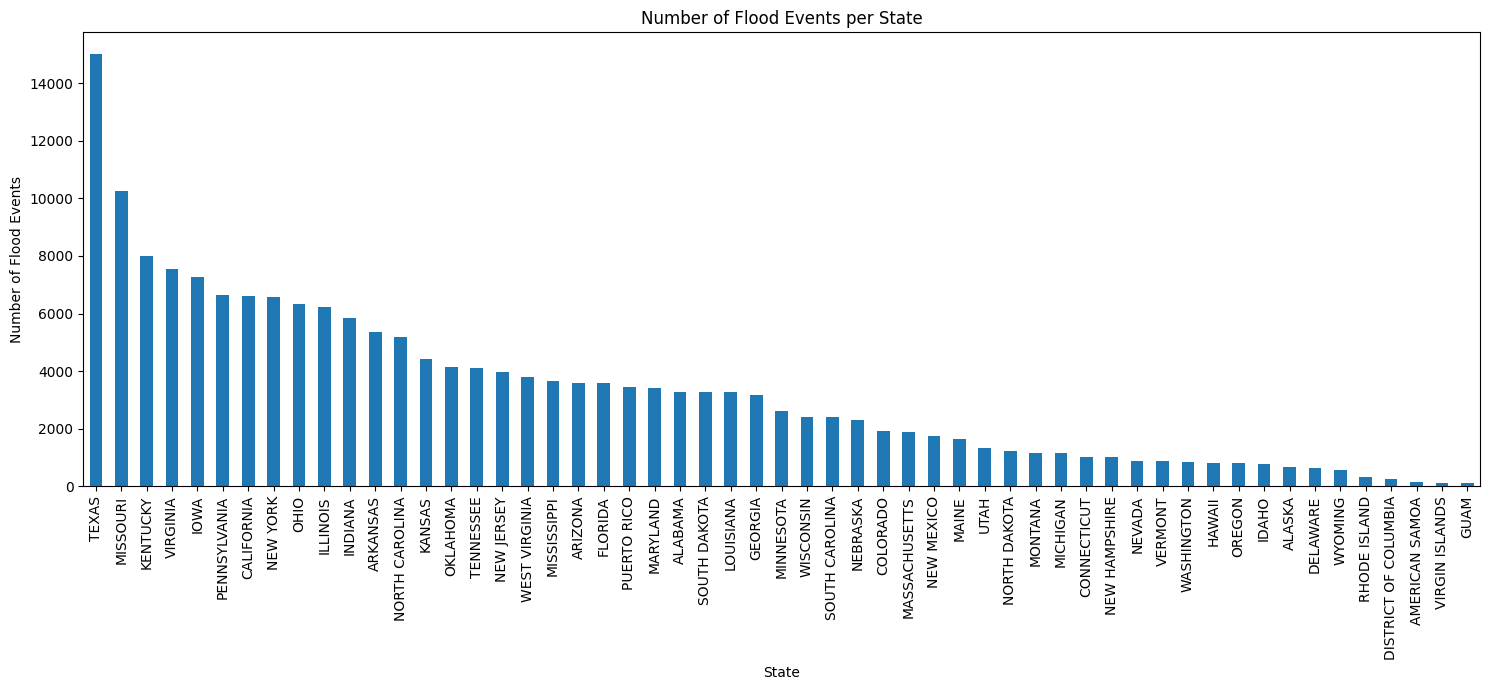

In [ ]:
# the flood for all the other states including texas


all_states_flood_df = all_df[all_df['EVENT_TYPE'].isin(flood_event_types)]
print(f"Number of Flood-related events in all states including Texas: {len(all_states_flood_df)}")

state_flood_counts = all_states_flood_df['STATE'].value_counts()

plt.figure(figsize=(15, 7))
state_flood_counts.plot(kind='bar')
plt.title('Number of Flood Events per State')
plt.xlabel('State')
plt.ylabel('Number of Flood Events')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# chloropleth for usa flood events


state_flood_freq_df = state_flood_counts.reset_index()
state_flood_freq_df.columns = ['STATE', 'Frequency']

state_flood_freq_df['STATE_LOWER'] = state_flood_freq_df['STATE'].str.lower()
state_flood_freq_df['STATE_ABBREVIATION'] = state_flood_freq_df['STATE_LOWER'].map(state_abbrev_map_lower)

state_flood_freq_df = state_flood_freq_df.drop(columns=['STATE_LOWER'])

# Log-transform frequency for color scaling, handle zero counts if any
state_flood_freq_df['Log_Frequency'] = np.log10(state_flood_freq_df['Frequency'].replace(0, np.nan))

# Get distribution landmarks for Flood Frequency
min_val_flood = state_flood_freq_df['Log_Frequency'].min()
median_val_flood = np.percentile(state_flood_freq_df['Log_Frequency'].dropna(), 50)
p75_val_flood = np.percentile(state_flood_freq_df['Log_Frequency'].dropna(), 75)
max_val_flood = state_flood_freq_df['Log_Frequency'].max()

# Map log frequency to custom scale [0, 1] for Flood Frequency
def custom_scale_flood(x):
    if pd.isna(x):
        return 0 # Or some other value for states with 0 floods
    if x <= median_val_flood:
        # Handle case where min_val_flood == median_val_flood (e.g., all states have same few floods)
        if median_val_flood - min_val_flood == 0: return 0.5
        return 0.5 * (x - min_val_flood) / (median_val_flood - min_val_flood)
    elif x <= p75_val_flood:
        # Handle case where median_val_flood == p75_val_flood
        if p75_val_flood - median_val_flood == 0: return 0.75
        return 0.5 + 0.25 * (x - median_val_flood) / (p75_val_flood - median_val_flood)
    else:
        # Handle case where p75_val_flood == max_val_flood
        if max_val_flood - p75_val_flood == 0: return 1.0
        return 0.75 + 0.25 * (x - p75_val_flood) / (max_val_flood - p75_val_flood)


state_flood_freq_df['Custom_Scale'] = state_flood_freq_df['Log_Frequency'].apply(custom_scale_flood)

# Add optional percentile info for hover for Flood Frequency
state_flood_freq_df['Percentile'] = state_flood_freq_df['Frequency'].rank(pct=True) * 100

# Custom hover text for Flood Frequency
state_flood_freq_df['hover_text'] = state_flood_freq_df.apply(
    lambda row: f"State: {row['STATE_ABBREVIATION']}<br>"
                f"Flood Count: {int(row['Frequency'])}<br>"
                f"Log₁₀(Flood Count): {row['Log_Frequency']:.2f}<br>" if not pd.isna(row['Log_Frequency']) else f"State: {row['STATE_ABBREVIATION']}<br>Flood Count: {int(row['Frequency'])}<br>Log₁₀(Flood Count): N/A<br>",
    axis=1
)


# Choropleth for Flood Frequency
fig_flood = px.choropleth(state_flood_freq_df,
                          locations='STATE_ABBREVIATION',
                          locationmode="USA-states",
                          color='Custom_Scale',
                          scope="usa",
                          color_continuous_scale=custom_colorscale, # Use the same custom scale
                          hover_name='STATE_ABBREVIATION',
                          hover_data={'hover_text': True}, # Use our custom text
                          title='Flood Event Frequency by State in the USA')

# Customize hover template to use our text
fig_flood.update_traces(hovertemplate="%{customdata[0]}<extra></extra>")


# Set color bar with actual frequency labels (approximate) for Flood Frequency
# Need to filter out NaNs from log frequency for tick calculations
valid_log_freq_flood = state_flood_freq_df['Log_Frequency'].dropna()

if not valid_log_freq_flood.empty:
    min_tick_flood = valid_log_freq_flood.min()
    median_tick_flood = np.percentile(valid_log_freq_flood, 50)
    p75_tick_flood = np.percentile(valid_log_freq_flood, 75)
    max_tick_flood = valid_log_freq_flood.max()

    tickvals_flood = [custom_scale_flood(min_tick_flood), custom_scale_flood(median_tick_flood),
                      custom_scale_flood(p75_tick_flood), custom_scale_flood(max_tick_flood)]
    ticktexts_flood = [
        f"{int(10**min_tick_flood)}",                  # Min
        f"{int(10**median_tick_flood)}",               # Median
        f"{int(10**p75_tick_flood)}",                  # 75th percentile
        f"{int(10**max_tick_flood)}"                   # Max
    ]

    fig_flood.update_layout(coloraxis_colorbar=dict(
        title="Flood Event Count",
        tickvals=tickvals_flood,
        ticktext=ticktexts_flood
    ))
else:
     fig_flood.update_layout(coloraxis_colorbar=dict(
        title="Flood Event Count",
        tickvals=[], # No ticks if no flood data
        ticktext=[]
     ))


fig_flood.show()

In [ ]:
# min and max value for beginyear month for texasdf

print(f"Minimum value of BEGIN_YEARMONTH for Texas: {texas_df['BEGIN_YEARMONTH'].min()}")
print(f"Maximum value of BEGIN_YEARMONTH for Texas: {texas_df['BEGIN_YEARMONTH'].max()}")

Minimum value of BEGIN_YEARMONTH for Texas: 199001
Maximum value of BEGIN_YEARMONTH for Texas: 202502


In [ ]:
#  read  all csv from /content/sample_data/climate_data and merge on first column (weather and environmental features)


csv_files_climate = glob.glob('/content/sample_data/climate_data/*.csv')
df_list_climate = []
for csv_file in csv_files_climate:
    df_climate = pd.read_csv(csv_file)
    df_list_climate.append(df_climate)

# Merge on the first column (index 0)
# Assuming the first column is consistent across files and suitable for merging
# If not, you might need to identify the key column by name
if df_list_climate:
    merged_df_climate = df_list_climate[0]
    for i in range(1, len(df_list_climate)):
        # Get the name of the first column from the current dataframe
        merge_column = df_list_climate[i].columns[0]
        merged_df_climate = pd.merge(merged_df_climate, df_list_climate[i], on=merge_column, how='outer') # Use 'outer' to keep all data
else:
    merged_df_climate = pd.DataFrame() # Create an empty DataFrame if no files are found

print("Merged Climate Data:")
print(merged_df_climate.head())
print(f"Shape of merged climate data: {merged_df_climate.shape}")

Merged Climate Data:
   Unnamed: 0  (m/s) Wind Speed (gridMET) at Texas, 1990-01-01 to 2025-02-28  \
0  1990-01-01                                             2.9822               
1  1990-01-02                                             4.9088               
2  1990-01-03                                             5.6646               
3  1990-01-04                                             2.9855               
4  1990-01-05                                             2.4513               

   (W/m2) Downward Shortwave Radiation (gridMET) at Texas, 1990-01-01 to 2025-02-28  \
0                                           105.1395                                  
1                                           103.3510                                  
2                                           111.5488                                  
3                                           117.1203                                  
4                                            84.8636           

In [ ]:
merged_df_climate.columns

Index(['Unnamed: 0',
       '(m/s) Wind Speed (gridMET) at Texas, 1990-01-01 to 2025-02-28',
       '(W/m2) Downward Shortwave Radiation (gridMET) at Texas, 1990-01-01 to 2025-02-28',
       '(mm) Precipitation (gridMET) at Texas, 1990-01-01 to 2025-02-28_x',
       '(g/kg) Specific Humidity (gridMET) at Texas, 1990-01-01 to 2025-02-28',
       '(deg C) Mean Temperature (gridMET) at Texas, 1990-01-01 to 2025-02-28',
       '(mm) Precipitation (gridMET) at Texas, 1990-01-01 to 2025-02-28_y'],
      dtype='object')

In [ ]:
merged_df_climate.columns = [
    "Date",
    "DSR",
    "Spec_Humid",
    "Mean_Temp",
    "Max_Prec",
    "Mean_Prec",
    "Wind_Speed"
]

In [ ]:
merged_df_climate.head()

,Date,DSR,Spec_Humid,Mean_Temp,Max_Prec,Mean_Prec,Wind_Speed
0,1990-01-01,2.9822,105.1395,16.6600,2.8993,6.0325,0.2787
1,1990-01-02,4.9088,103.3510,24.9058,4.4692,7.9835,1.2124
2,1990-01-03,5.6646,111.5488,33.1093,6.0139,11.2773,1.7705
3,1990-01-04,2.9855,117.1203,21.2031,4.1647,8.9746,1.1339
4,1990-01-05,2.4513,84.8636,28.7336,3.9949,7.5393,2.2638


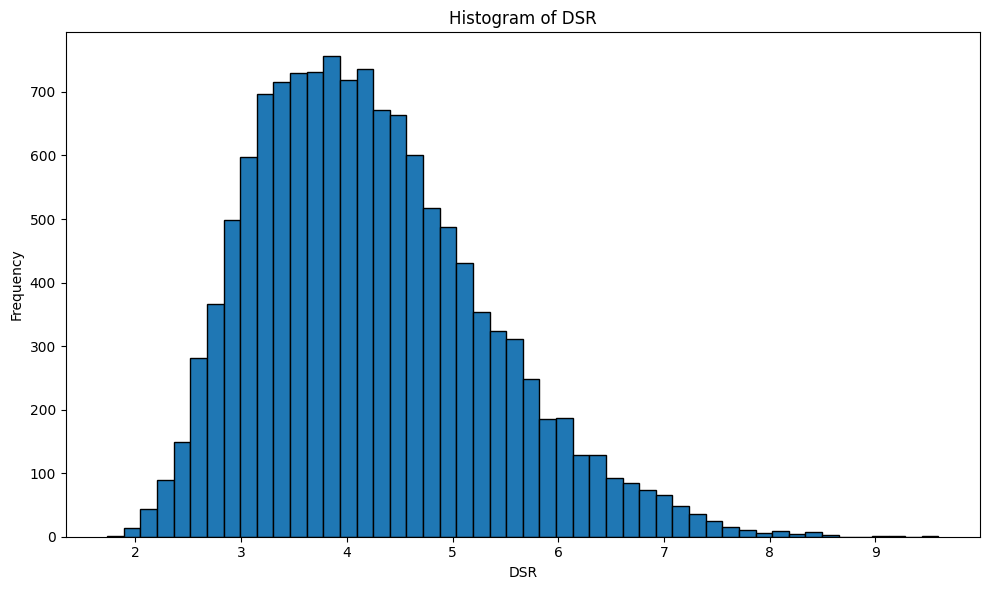

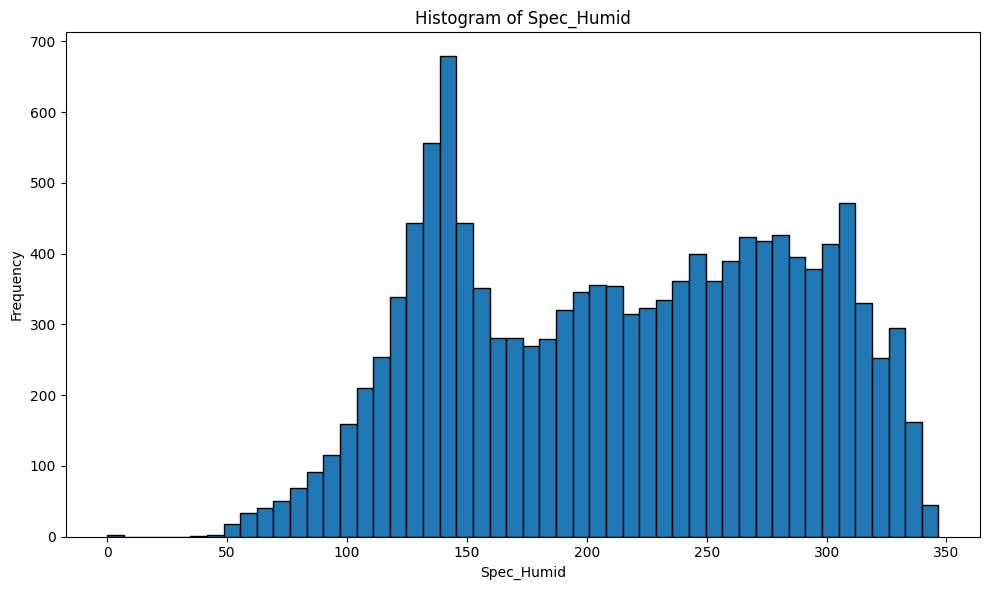

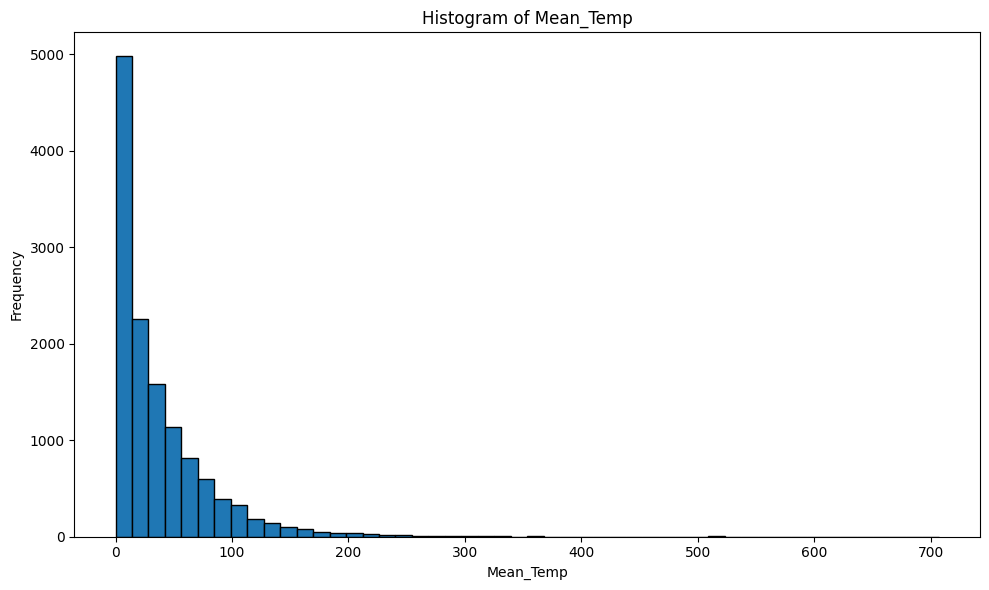

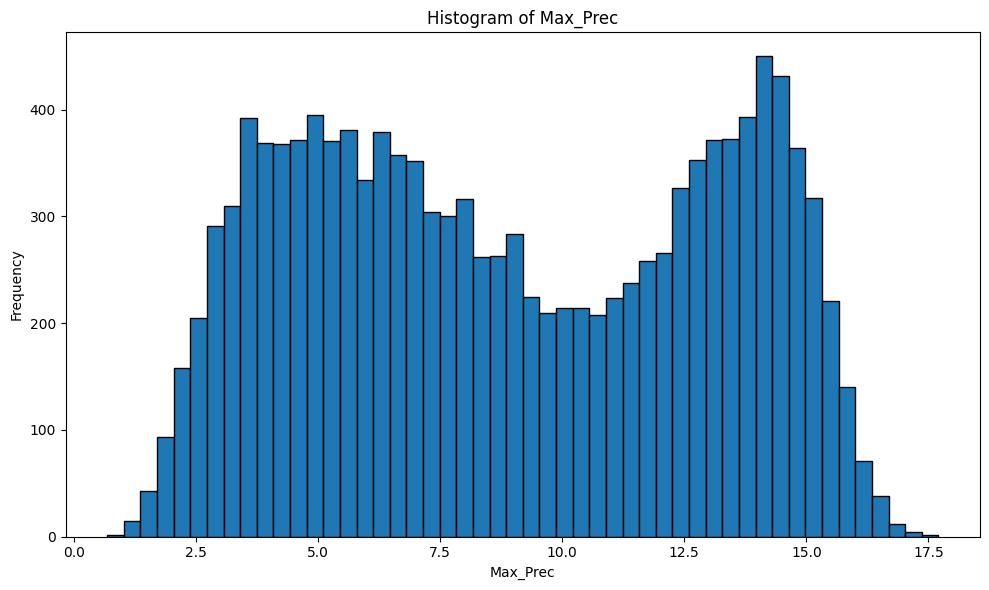

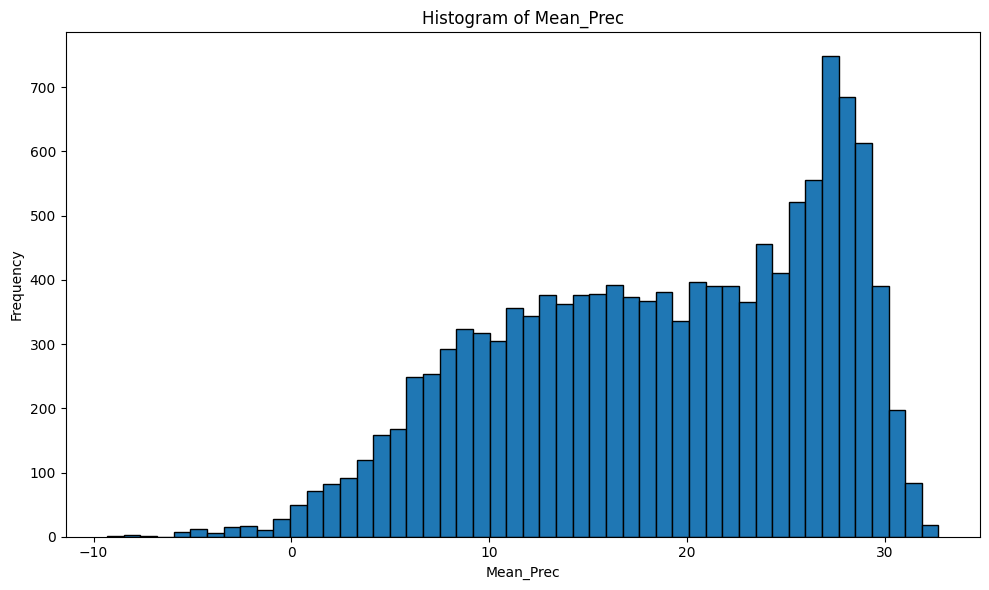

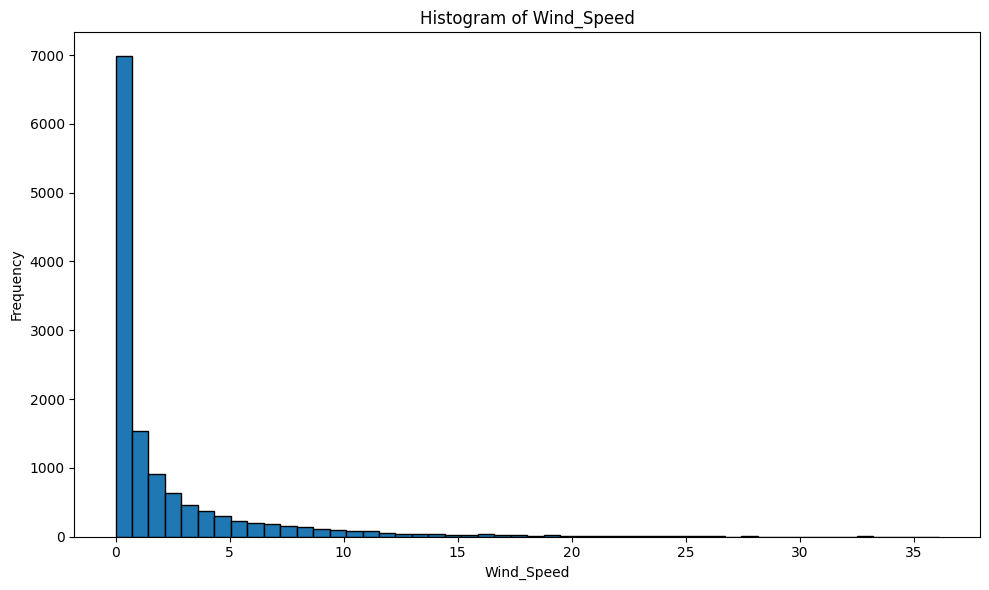

In [ ]:
# histogram for each column in  merged_df_climate


# Select only numeric columns for histogram
numeric_cols = merged_df_climate.select_dtypes(include=np.number).columns

# Create histograms for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    plt.hist(merged_df_climate[col].dropna(), bins=50, edgecolor='black') # dropna to handle missing values
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [ ]:
texas_flood_df.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH',
       'END_DAY', 'END_TIME', 'EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS',
       'YEAR', 'MONTH_NAME', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME',
       'WFO', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME',
       'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT',
       'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'SOURCE',
       'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE',
       'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE',
       'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE',
       'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
       'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON',
       'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE'],
      dtype='object')

In [ ]:
# dumping some obvious unimportant feature

texas_flood_df = texas_flood_df[['BEGIN_YEARMONTH', 'BEGIN_TIME', 'END_YEARMONTH', 'END_DAY', 'END_TIME',
        'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME',
       'EVENT_TYPE',  'BEGIN_DATE_TIME',
       'END_DATE_TIME',
        'BEGIN_LAT', 'BEGIN_LON', 'END_LAT',
       'END_LON',
      ]]

In [ ]:
texas_flood_df.columns

Index(['BEGIN_YEARMONTH', 'BEGIN_TIME', 'END_YEARMONTH', 'END_DAY', 'END_TIME',
       'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE',
       'BEGIN_DATE_TIME', 'END_DATE_TIME', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT',
       'END_LON'],
      dtype='object')

In [ ]:
#  merge texas_df with merged_df_climate with outer join

# Convert 'BEGIN_YEARMONTH' from integer to string to match format or extract date if possible
# Assuming BEGIN_YEARMONTH is in 'YYYYMM' format
texas_flood_df['Date'] = pd.to_datetime(texas_flood_df['BEGIN_YEARMONTH'].astype(str), format='%Y%m')

# Ensure 'Date' column in merged_df_climate is also datetime objects
merged_df_climate['Date'] = pd.to_datetime(merged_df_climate['Date'])

# Merge texas_df with merged_df_climate on the 'Date' column with an outer join
# This will keep all rows from both dataframes and fill missing values with NaN
texas_climate_merged_df = pd.merge(texas_flood_df, merged_df_climate, on='Date', how='outer')

print("\nMerged Texas Storm and Climate Data (Outer Join):")
print(texas_climate_merged_df.head())
print(f"Shape of merged Texas data: {texas_climate_merged_df.shape}")


Merged Texas Storm and Climate Data (Outer Join):
   BEGIN_YEARMONTH  BEGIN_TIME  END_YEARMONTH  END_DAY  END_TIME STATE  \
0              NaN         NaN            NaN      NaN       NaN   NaN   
1              NaN         NaN            NaN      NaN       NaN   NaN   
2              NaN         NaN            NaN      NaN       NaN   NaN   
3              NaN         NaN            NaN      NaN       NaN   NaN   
4              NaN         NaN            NaN      NaN       NaN   NaN   

   STATE_FIPS  YEAR MONTH_NAME EVENT_TYPE  ... BEGIN_LON END_LAT  END_LON  \
0         NaN   NaN        NaN        NaN  ...       NaN     NaN      NaN   
1         NaN   NaN        NaN        NaN  ...       NaN     NaN      NaN   
2         NaN   NaN        NaN        NaN  ...       NaN     NaN      NaN   
3         NaN   NaN        NaN        NaN  ...       NaN     NaN      NaN   
4         NaN   NaN        NaN        NaN  ...       NaN     NaN      NaN   

        Date     DSR  Spec_Humid Mean_Tem

In [ ]:
texas_climate_merged_df

,BEGIN_YEARMONTH,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,...,BEGIN_LON,END_LAT,END_LON,Date,DSR,Spec_Humid,Mean_Temp,Max_Prec,Mean_Prec,Wind_Speed
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1990-01-01,2.9822,105.1395,16.6600,2.8993,6.0325,0.2787
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1990-01-02,4.9088,103.3510,24.9058,4.4692,7.9835,1.2124
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1990-01-03,5.6646,111.5488,33.1093,6.0139,11.2773,1.7705
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1990-01-04,2.9855,117.1203,21.2031,4.1647,8.9746,1.1339
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1990-01-05,2.4513,84.8636,28.7336,3.9949,7.5393,2.2638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2025-02-24,3.0070,204.5266,1.0000,4.0072,14.3659,0.0016
27545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2025-02-25,3.1653,204.6302,0.8000,4.6684,17.0500,0.0016
27546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2025-02-26,4.6489,199.1331,11.5000,5.6683,17.2181,0.0592
27547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2025-02-27,4.1029,182.5379,1.4000,5.0074,12.6829,0.0035


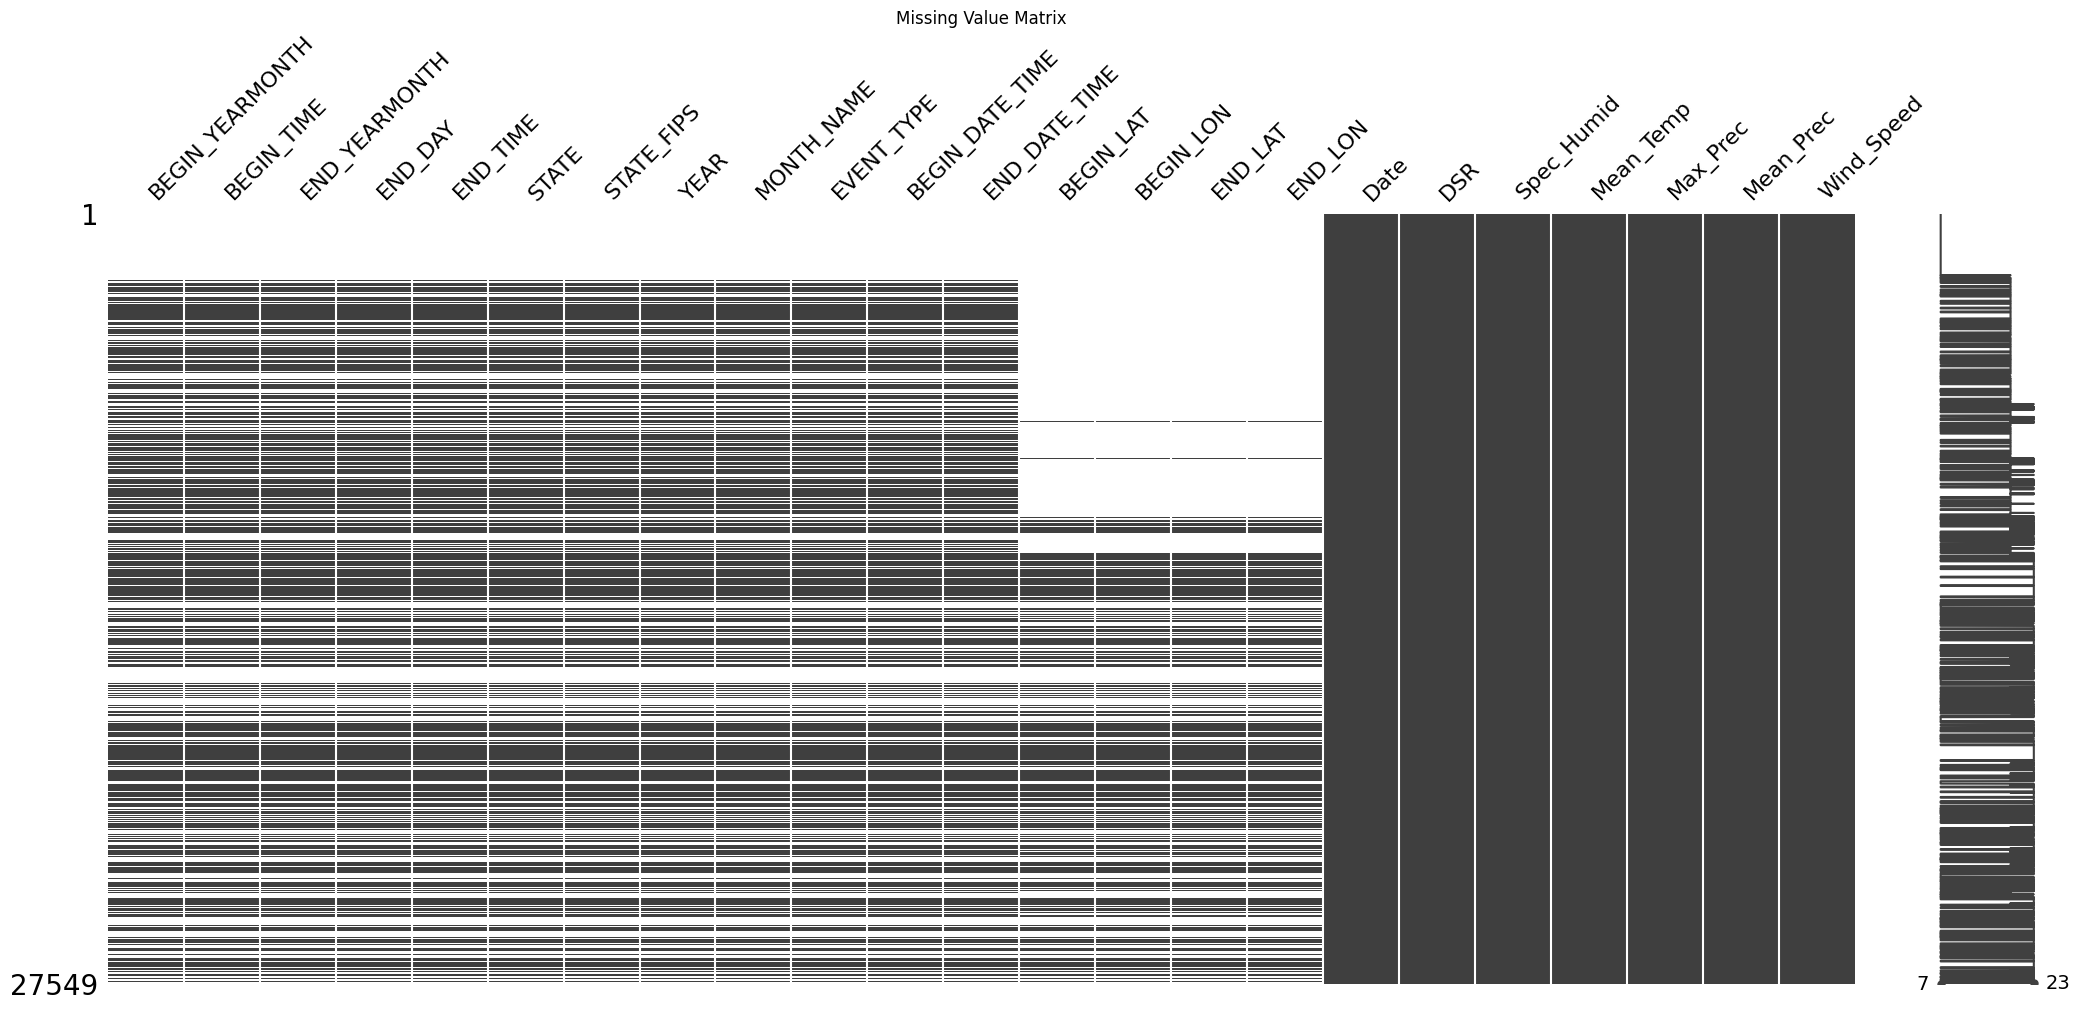

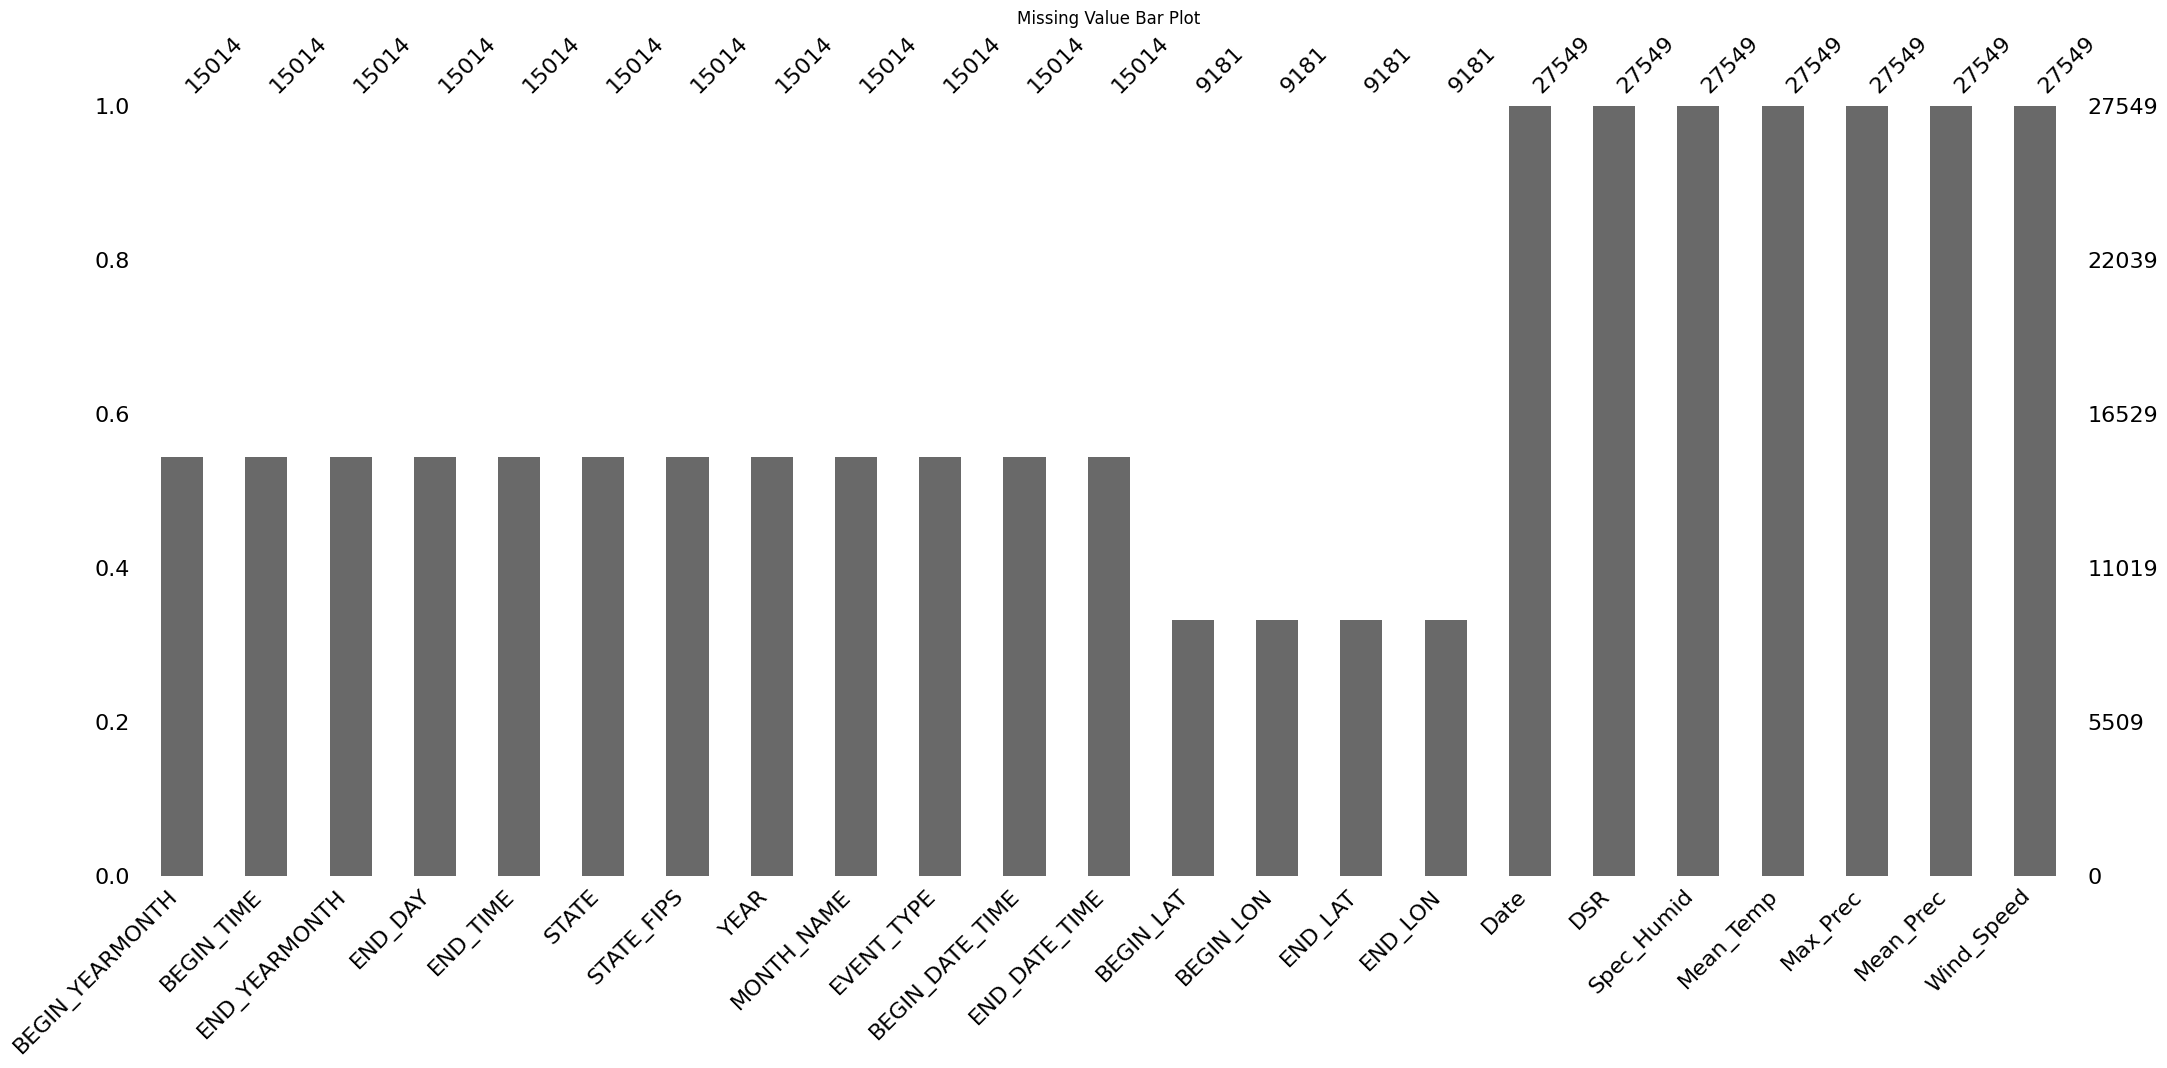

In [ ]:
#  visualize missing value

import matplotlib.pyplot as plt
import missingno as msno

# Visualize missing values
msno.matrix(texas_climate_merged_df)
plt.title('Missing Value Matrix')
plt.show()

msno.bar(texas_climate_merged_df)
plt.title('Missing Value Bar Plot')
plt.show()

In [ ]:
#  take off injuries_direct, injuries_indirect,deaths_direct,deaths_indirect,damage_crops,SOURCE  fromtexas_climate_merged_df

texas_climate_merged_df = texas_climate_merged_df.drop(columns=['BEGIN_YEARMONTH', 'BEGIN_TIME', 'END_YEARMONTH', 'END_DAY', 'END_TIME'])

In [ ]:
texas_climate_merged_df.columns

Index(['STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE',
       'BEGIN_DATE_TIME', 'END_DATE_TIME', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT',
       'END_LON', 'Date', 'DSR', 'Spec_Humid', 'Mean_Temp', 'Max_Prec',
       'Mean_Prec', 'Wind_Speed'],
      dtype='object')

In [ ]:
# unique values in texas_climate_merged_df['EVENT_TYPE']

texas_climate_merged_df['EVENT_TYPE'].unique()


array([nan, 'Flood', 'Flash Flood', 'Coastal Flood', 'Storm Surge/Tide'],
      dtype=object)

In [ ]:
# add  a y column to texas_climate_merged_df if texas_climate_merged_df['EVENT_TYPE'] is nan put 0 else put 1

texas_climate_merged_df['y'] = texas_climate_merged_df['EVENT_TYPE'].notna().astype(int)

# Display the first few rows with the new 'y' column
print(texas_climate_merged_df[['EVENT_TYPE', 'y']].head())

  EVENT_TYPE  y
0        NaN  0
1        NaN  0
2        NaN  0
3        NaN  0
4        NaN  0


In [ ]:
texas_climate_merged_df.columns

Index(['STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'EVENT_TYPE',
       'BEGIN_DATE_TIME', 'END_DATE_TIME', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT',
       'END_LON', 'Date', 'DSR', 'Spec_Humid', 'Mean_Temp', 'Max_Prec',
       'Mean_Prec', 'Wind_Speed', 'y'],
      dtype='object')

In [ ]:
#  texas_predict= texas_climate_merged_df['EVENT_TYPE',
#         'Date', 'DSR', 'Spec_Humid', 'Mean_Temp', 'Max_Prec',
#        'Mean_Prec', 'Wind_Speed', 'y'].copy

texas_predict = texas_climate_merged_df[[
        'Date', 'DSR', 'Spec_Humid', 'Mean_Temp', 'Max_Prec',
       'Mean_Prec', 'Wind_Speed', 'y']].copy()

In [ ]:
texas_predict.head()

,Date,DSR,Spec_Humid,Mean_Temp,Max_Prec,Mean_Prec,Wind_Speed,y
0,1990-01-01,2.9822,105.1395,16.6600,2.8993,6.0325,0.2787,0
1,1990-01-02,4.9088,103.3510,24.9058,4.4692,7.9835,1.2124,0
2,1990-01-03,5.6646,111.5488,33.1093,6.0139,11.2773,1.7705,0
3,1990-01-04,2.9855,117.1203,21.2031,4.1647,8.9746,1.1339,0
4,1990-01-05,2.4513,84.8636,28.7336,3.9949,7.5393,2.2638,0


In [ ]:
#  no of rows in texas_predict

print(f"Number of rows in texas_predict: {len(texas_predict)}")

Number of rows in texas_predict: 27549


In [ ]:
#  number of unique dates in texas_predict

texas_predict['Date'].nunique()

12843

In [ ]:
#  if date is repeated keep date where y=1

# Sort by Date and y (descending) to keep y=1 if duplicates exist
texas_predict_sorted = texas_predict.sort_values(by=['Date', 'y'], ascending=[True, False])

# Drop duplicates based on 'Date', keeping the first occurrence (which will be y=1 if it exists)
texas_predict_unique_dates = texas_predict_sorted.drop_duplicates(subset=['Date'], keep='first')

print(f"Number of rows after keeping unique dates (prioritizing y=1): {len(texas_predict_unique_dates)}")
print(texas_predict_unique_dates.head())

Number of rows after keeping unique dates (prioritizing y=1): 12843
        Date     DSR  Spec_Humid  Mean_Temp  Max_Prec  Mean_Prec  Wind_Speed  \
0 1990-01-01  2.9822    105.1395    16.6600    2.8993     6.0325      0.2787   
1 1990-01-02  4.9088    103.3510    24.9058    4.4692     7.9835      1.2124   
2 1990-01-03  5.6646    111.5488    33.1093    6.0139    11.2773      1.7705   
3 1990-01-04  2.9855    117.1203    21.2031    4.1647     8.9746      1.1339   
4 1990-01-05  2.4513     84.8636    28.7336    3.9949     7.5393      2.2638   

   y  
0  0  
1  0  
2  0  
3  0  
4  0  


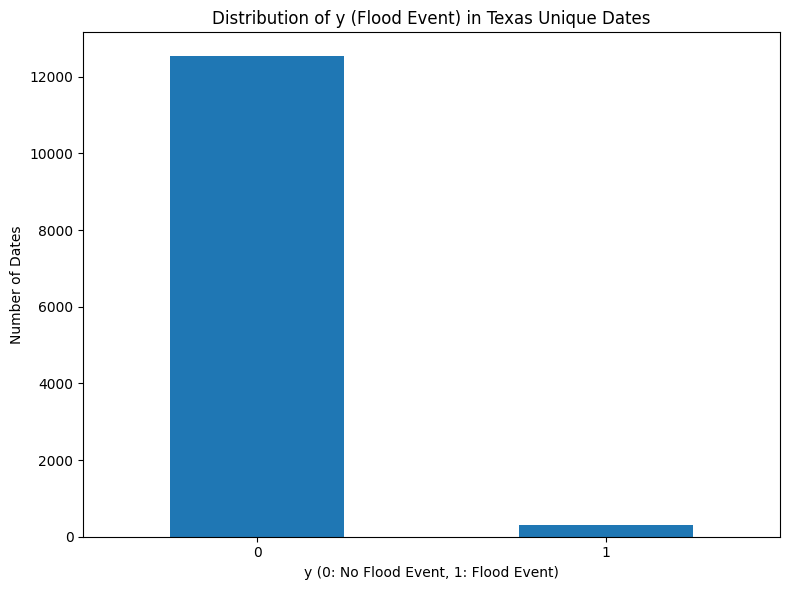

In [ ]:
#  bar chart of texas_predict_unique_dates  for y =0 and y=1

import matplotlib.pyplot as plt
# Calculate the counts for each value of 'y'
y_counts = texas_predict_unique_dates['y'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
y_counts.plot(kind='bar')
plt.title('Distribution of y (Flood Event) in Texas Unique Dates')
plt.xlabel('y (0: No Flood Event, 1: Flood Event)')
plt.ylabel('Number of Dates')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
texas_predict_unique_dates.index

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       27539, 27540, 27541, 27542, 27543, 27544, 27545, 27546, 27547, 27548],
      dtype='int64', length=12843)

In [ ]:
# extract day , month and year column from date

texas_predict_unique_dates['Day'] = texas_predict_unique_dates['Date'].dt.day
texas_predict_unique_dates['Month'] = texas_predict_unique_dates['Date'].dt.month
texas_predict_unique_dates['Year'] = texas_predict_unique_dates['Date'].dt.year
print(texas_predict_unique_dates[['Date', 'Day', 'Month', 'Year']].head())

        Date  Day  Month  Year
0 1990-01-01    1      1  1990
1 1990-01-02    2      1  1990
2 1990-01-03    3      1  1990
3 1990-01-04    4      1  1990
4 1990-01-05    5      1  1990


In [ ]:


# Convert month to cyclic representation
texas_predict_unique_dates['month_sin'] = np.sin(2 * np.pi * texas_predict_unique_dates['Month'] / 12)
texas_predict_unique_dates['month_cos'] = np.cos(2 * np.pi * texas_predict_unique_dates['Month'] / 12)

print(texas_predict_unique_dates[['Month', 'month_sin', 'month_cos']].head())


   Month  month_sin  month_cos
0      1        0.5   0.866025
1      1        0.5   0.866025
2      1        0.5   0.866025
3      1        0.5   0.866025
4      1        0.5   0.866025


In [ ]:
texas_predict_unique_dates.columns

Index(['Date', 'DSR', 'Spec_Humid', 'Mean_Temp', 'Max_Prec', 'Mean_Prec',
       'Wind_Speed', 'y', 'Day', 'Month', 'Year', 'month_sin', 'month_cos'],
      dtype='object')

In [ ]:
#  download csv of texas_predict_unique_dates

texas_predict_unique_dates.to_csv('texas_predict_unique_dates.csv', index=False)